
Some simple examples of what you can do with NLP.
Easy first, then moderately difficult, and then graphical snippets.
https://quip.com/5DtaAN4rsgwF
Created on Nov 17, 2015

@author: jbarber
 


In [0]:
#===============================================================================
# DOWNLOAD A PROJECT GUTENBERG TEXT
#===============================================================================
import nltk
# $ pip install requests
import requests

url = "http://www.gutenberg.org/files/2554/2554.txt"
response = requests.get(url)
crime_and_punishment = response.content.decode()

In [4]:
#===============================================================================
# WORD TOKENIZE A TEXT
#===============================================================================
nltk.download('punkt')
# continuing from above
from nltk import word_tokenize

word_tokens = word_tokenize(crime_and_punishment)
num_words = len(word_tokens)
print("Number of words:", num_words)


[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
('Number of words:', 24)


In [5]:
#===============================================================================
# SENTENCE TOKENIZE A TEXT
#===============================================================================

# also continuing from first snippet
from nltk import sent_tokenize

sent_tokens = sent_tokenize(crime_and_punishment)
num_sents = len(sent_tokens)
print("Number of sentences:", num_sents)

('Number of sentences:', 1)


In [8]:
#===============================================================================
# CREATE A CONCORDANCE
#===============================================================================
nltk.download('brown')
from nltk import Text
from nltk.corpus import brown

tokens = brown.words('cg13')
text = Text(tokens)
text.concordance("sex", lines=30)

[nltk_data] Downloading package brown to /content/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
Displaying 27 of 27 matches:
arewell To Arms never maintained that sex was all . Hemingway's fiction is supp
imation of the sexual motive . Though sex in some form or other enters into all
tic to explain everything in terms of sex . `` All is not sex '' , declared Law
thing in terms of sex . `` All is not sex '' , declared Lawrence . Man is not c
 . But for the beat generation all is sex . Nothing is more revealing of the wa
this group than their attitude toward sex . For the beatnik , like the hipster 
hat is based on the repression of the sex instinct . He has elevated sex -- not
of the sex instinct . He has elevated sex -- not Eros or libido but pure , spon
 but pure , spontaneous , uninhibited sex -- to the rank of the godhead ; ; it 
gh the body of the universe . Jazz is sex , marijuana is a stimulus to sex , th
z is sex , marijuana is a stimulus to sex , the beat tempo is adj

In [10]:
#===============================================================================
# CONTEXTUAL SIMILARITY
#===============================================================================
nltk.download('genesis')
from nltk import Text
from nltk.corpus import genesis

tokens = genesis.words('english-web.txt')
text = Text(tokens)
print("Words that occur in contexts similar to the contexts 'fought' occurs in:")
text.similar("fought")


[nltk_data] Downloading package genesis to /content/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
Words that occur in contexts similar to the contexts 'fought' occurs in:
lain fared been sex


In [12]:

#===============================================================================
# SEMANTIC SIMILARITY
#===============================================================================
nltk.download('wordnet')
from nltk.corpus import wordnet

bible = wordnet.synset('bible.n.01')
book = wordnet.synset('book.n.01')
scroll = wordnet.synset('scroll.n.02')

scroll_bible = scroll.lowest_common_hypernyms(bible)
book_bible = book.lowest_common_hypernyms(bible)

print("Lowest common hypernym for scroll and bible:", scroll_bible)
print("Lowest common hypernym for book and bible:", book_bible)

[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
('Lowest common hypernym for scroll and bible:', [Synset('writing.n.02')])
('Lowest common hypernym for book and bible:', [Synset('entity.n.01')])


In [14]:

#===============================================================================
# PART OF SPEECH TAGGER
#===============================================================================
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize

sentence = ("In the beginning when God created the heavens and the earth, "
"the earth was a formless void and darkness covered the face of "
"the deep, while a wind from God swept over the face of the waters.")
tokens = word_tokenize(sentence)
tagged_tokens = pos_tag(tokens)

print('Tokens tagged with part of speech:', tagged_tokens)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /content/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
('Tokens tagged with part of speech:', [('In', 'IN'), ('the', 'DT'), ('beginning', 'NN'), ('when', 'WRB'), ('God', 'NNP'), ('created', 'VBD'), ('the', 'DT'), ('heavens', 'NNS'), ('and', 'CC'), ('the', 'DT'), ('earth', 'NN'), (',', ','), ('the', 'DT'), ('earth', 'NN'), ('was', 'VBD'), ('a', 'DT'), ('formless', 'JJ'), ('void', 'NN'), ('and', 'CC'), ('darkness', 'NN'), ('covered', 'VBD'), ('the', 'DT'), ('face', 'NN'), ('of', 'IN'), ('the', 'DT'), ('deep', 'JJ'), (',', ','), ('while', 'IN'), ('a', 'DT'), ('wind', 'NN'), ('from', 'IN'), ('God', 'NNP'), ('swept', 'VBD'), ('over', 'IN'), ('the', 'DT'), ('face', 'NN'), ('of', 'IN'), ('the', 'DT'), ('waters', 'NNS'), ('.', '.')])


In [18]:
#===============================================================================
# PROPOSITIONAL LOGIC
#===============================================================================
import sys
reload(sys)
sys.setdefaultencoding('utf8')
from nltk import ResolutionProver
from nltk.sem import Expression

read_expr = Expression.fromstring
assumpt1 = read_expr('man(socrates)') # socrates is a man
assumpt2 = read_expr('all x.(man(x) → mortal(x))') # for all x, if x is man, x is mortal
goal = read_expr('mortal(socrates)') # socrates is mortal

resolution = ResolutionProver().prove(goal, [assumpt1, assumpt2], verbose=True)
print("Socrates is mortal:", resolution)

UnicodeDecodeError: ignored

In [19]:
#===============================================================================
# CHUNKING NOUN PHRASES
#===============================================================================

# $ pip install matplotlib
from nltk import pos_tag, RegexpParser, word_tokenize

# optional determiner (DT) followed by 0 or more adjectives (JJ) and
# then a noun (NN)
grammar = "NP: {<DT>?<JJ>*<NN>}"

# tag tokens
sentence = "Better is a poor but wise youth than an old but foolish king."
tokens = word_tokenize(sentence)
tagged_tokens = pos_tag(tokens)

# now chunk
chunk_parser = RegexpParser(grammar)
parsed = chunk_parser.parse(tagged_tokens)

# graph the results
parsed.draw()




TclError: ignored

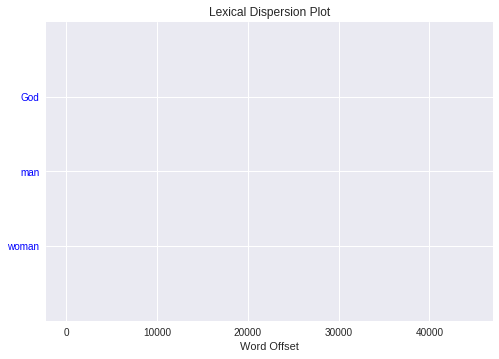

In [20]:
#===============================================================================
# DISPERSION PLOT
#===============================================================================

from nltk import Text
from nltk.corpus import genesis

tokens = genesis.words('english-kjv.txt')
text = Text(tokens)
text.dispersion_plot(["God", "man", "woman"])